
 Visualizing Cristo_e_la_cananea,_Sebastiano_Ricci_001_damaged_3.jpg


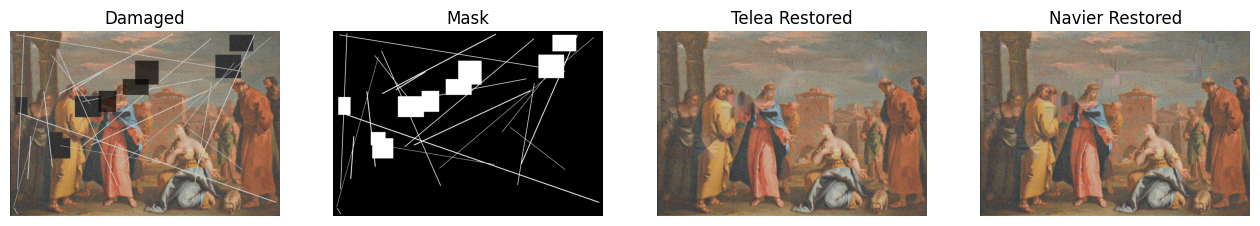


 Visualizing Cristo_e_la_cananea,_Sebastiano_Ricci_001_damaged_2.jpg


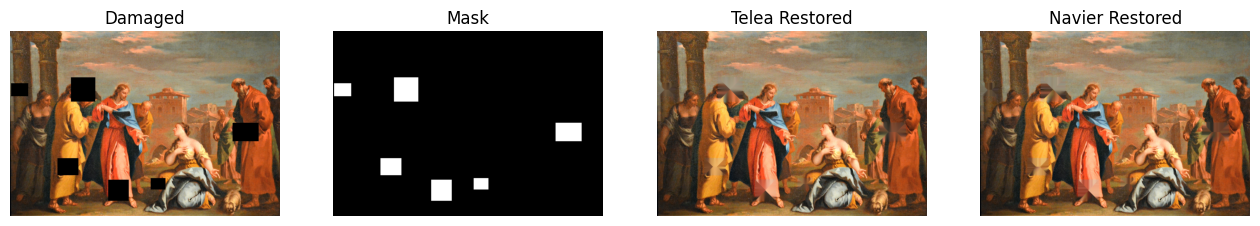


 Visualizing Sebastiano_Ricci_003_damaged_4.jpg


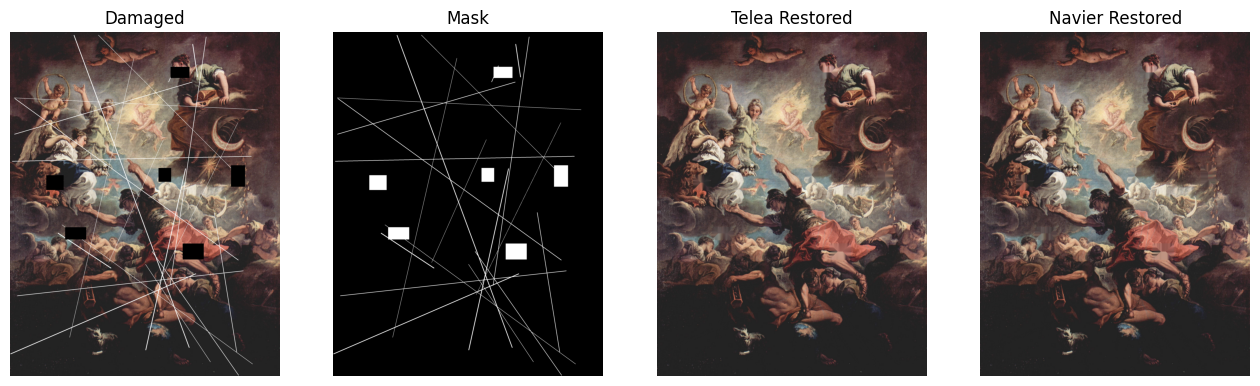

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

DAMAGED_DIR = "../data/damaged"
MASKS_DIR = "../data/masks"
RESULTS_DIR = "../results/traditional"

def load_rgb(path):
    if os.path.exists(path):
        img = cv2.imread(path)
        if img is not None:
            return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(" Could not load:", path)
    return None

def visualize_one(damaged_filename):
    damaged_path = os.path.join(DAMAGED_DIR, damaged_filename)
    mask_file = damaged_filename.replace("damaged", "mask").rsplit(".", 1)[0] + ".png"
    mask_path = os.path.join(MASKS_DIR, mask_file)
    telea_path = os.path.join(RESULTS_DIR, damaged_filename.replace("damaged", "telea"))
    navier_path = os.path.join(RESULTS_DIR, damaged_filename.replace("damaged", "navier"))

    damaged = load_rgb(damaged_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) if os.path.exists(mask_path) else None
    telea = load_rgb(telea_path)
    navier = load_rgb(navier_path)

    fig, axs = plt.subplots(1, 4, figsize=(16, 5))
    titles = ["Damaged", "Mask", "Telea Restored", "Navier Restored"]
    images = [damaged, mask, telea, navier]

    for i, (img, title) in enumerate(zip(images, titles)):
        if img is not None:
            if title == "Mask":
                axs[i].imshow(img, cmap="gray")
            else:
                axs[i].imshow(img)
            axs[i].set_title(title)
        else:
            axs[i].text(0.5, 0.5, "Missing", ha="center", va="center", fontsize=12, color="red")
            axs[i].set_title(title)
        axs[i].axis("off")

    plt.show()

damaged_files = [f for f in os.listdir(DAMAGED_DIR) if "_damaged_" in f][:3]

for df in damaged_files:
    print(f"\n Visualizing {df}")
    visualize_one(df)
